In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

import missingno as msno
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
from datetime import date, datetime, timedelta

In [2]:
df = pd.read_csv('member_sample.csv', index_col = 0)

In [3]:
df.head()

,Individual Key,Household Key,Member Flag,City,State - Grouped,ZIP5,ZIP9,FSV CMSI Flag,FSV Credit Card Flag,FSV Deposit Program Flag,...,SC Vehicle Manufacturer Name,SC Vehicle Model Name,SVC Facility Name,SVC Facility Type,Total Cost,Tow Destination Latitude,Tow Destination Longitude,Tow Destination Name,Was Duplicated,Was Towed To AAR Referral
0,10000003.0,10462590.0,Y,NEW HAVEN,CT,6511.0,65111349.0,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,41.0,-71.0,Aar / Johnson's Auto Service,0.0,1.0
2,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,Astro Wrecker Service,independent repair,30.0,0.0,0.0,NaN,0.0,0.0
3,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,0.0,0.0,NaN,0.0,0.0
4,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,30.0,0.0,0.0,NaN,0.0,0.0


## Define Useful Functions

In [4]:
#Turn Y and N values to binary
def to_binary(x):
    if x == 'Y' or x == 'Yes':
        return 1
    else:
        return 0

In [5]:
#Find columns that contains 'String' value
def print_cols(df, string):
    cols = [i for i in df.columns if string in i]
    return cols

In [6]:
#Map means to 1 or 0
def buy_or_not(x):
    if x > 0:
        return 1
    else:
        return 0

### Function to Calculate Age

In [7]:
def calcualte_age(date_string):
    try:
        iso = datetime.fromisoformat(date_string)
        age = (datetime.now() - iso) // timedelta(days=365.2425)
    except:
        age = np.nan
    return age

In [8]:
products = print_cols(df, 'FSV')
products

['FSV CMSI Flag',
 'FSV Credit Card Flag',
 'FSV Deposit Program Flag',
 'FSV Home Equity Flag',
 'FSV ID Theft Flag',
 'FSV Mortgage Flag']

In [9]:
df_products = df[products]
df_products.head()

,FSV CMSI Flag,FSV Credit Card Flag,FSV Deposit Program Flag,FSV Home Equity Flag,FSV ID Theft Flag,FSV Mortgage Flag
0,N,N,N,N,N,N
1,N,Y,N,N,N,N
2,N,Y,N,N,N,N
3,N,Y,N,N,N,N
4,N,Y,N,N,N,N


### Turn Y and N Values into Booleans

In [10]:
for prod in products:
    df[prod] = df[prod].apply(to_binary)

df[products].describe()

,FSV CMSI Flag,FSV Credit Card Flag,FSV Deposit Program Flag,FSV Home Equity Flag,FSV ID Theft Flag,FSV Mortgage Flag
count,21344.000000,21344.000000,21344.000000,21344.000000,21344.000000,21344.000000
mean,0.044556,0.059923,0.002296,0.000422,0.023473,0.001265
std,0.206331,0.237350,0.047860,0.020531,0.151403,0.035545
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
fsv_services = df.groupby('Household Key')[products].sum()

In [12]:
fsv_services.head()

,FSV CMSI Flag,FSV Credit Card Flag,FSV Deposit Program Flag,FSV Home Equity Flag,FSV ID Theft Flag,FSV Mortgage Flag
Household Key,,,,,,
875.0,0,1,0,0,0,0
969.0,0,0,0,0,0,0
3338.0,0,0,0,0,0,0
8718.0,0,0,0,0,0,0
11524.0,0,0,0,0,0,0


In [13]:
fsv_services['FSV Services Count'] = fsv_services.sum(axis=1)

In [14]:
fsv_services.head()

,FSV CMSI Flag,FSV Credit Card Flag,FSV Deposit Program Flag,FSV Home Equity Flag,FSV ID Theft Flag,FSV Mortgage Flag,FSV Services Count
Household Key,,,,,,,
875.0,0,1,0,0,0,0,1
969.0,0,0,0,0,0,0,0
3338.0,0,0,0,0,0,0,0
8718.0,0,0,0,0,0,0,0
11524.0,0,0,0,0,0,0,0


In [15]:
features = ['Number of Children', 'Responded to Catalog', 'Race', 'Length Of Residence', 'Mail Responder',
           'Home Owner', 'Income', 'Date Of Birth', 'Children', 'Education', 'Dwelling Type', 'Credit Ranges', 
           'Language', 'Gender']

In [16]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21344 entries, 0 to 99998
Data columns (total 14 columns):
Number of Children      12010 non-null object
Responded to Catalog    860 non-null object
Race                    12010 non-null object
Length Of Residence     12010 non-null float64
Mail Responder          12010 non-null object
Home Owner              11629 non-null object
Income                  11943 non-null object
Date Of Birth           10191 non-null object
Children                12010 non-null object
Education               12010 non-null object
Dwelling Type           15891 non-null object
Credit Ranges           12010 non-null object
Language                12010 non-null object
Gender                  8783 non-null object
dtypes: float64(1), object(13)
memory usage: 2.4+ MB


### Create Age Column

In [17]:
df['age'] = [calcualte_age(item) for item in df['Date Of Birth']]

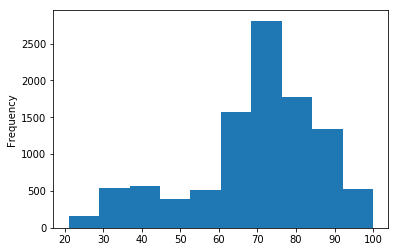

In [18]:
df.age.plot(kind = 'hist')

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<function matplotlib.pyplot.show(*args, **kw)>

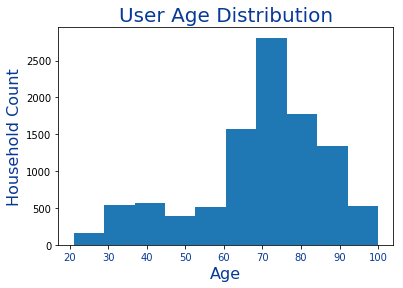

In [19]:
X = df.age
DF_75th = round(X.describe()['75%'], 2)
DF_AVG = round(X.describe()['mean'], 2)

plt.hist(X)
plt.ylabel('Household Count', fontsize = 16, color = '#073997')
plt.xlabel('Age', fontsize = 16, color = '#073997')
plt.xticks( fontsize =10, color = '#073997')
plt.title('User Age Distribution', fontsize = 20, color = '#073997')
plt.savefig('User_age_histogram', bbox_inches = 'tight')
plt.show

### Turn Children Counts into numerical columns

In [20]:
vals = df['Number of Children'].value_counts().index
nums = list(range(7))
df['Number of Children'] = df['Number of Children'].map({v:n for v,n in zip(vals,nums)})
df['Number of Children'].value_counts()

0.0    5482
1.0    3871
2.0    1582
3.0     750
4.0     276
5.0      45
6.0       4
Name: Number of Children, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

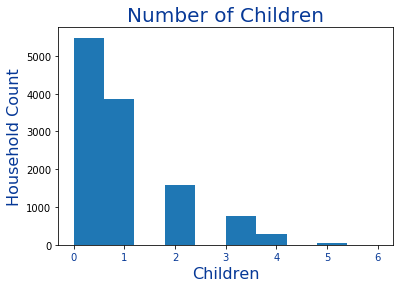

In [21]:
X = df['Number of Children']

plt.hist(X)
plt.ylabel('Household Count', fontsize = 16, color = '#073997')
plt.xlabel('Children', fontsize = 16, color = '#073997')
plt.xticks( fontsize =10, color = '#073997')
plt.title('Number of Children', fontsize = 20, color = '#073997')
plt.savefig('User_Children_histogram', bbox_inches = 'tight')
plt.show

In [22]:
df['Children'].value_counts()

Yes    6631
No     5379
Name: Children, dtype: int64

In [23]:
df['Children'] = df['Children'].apply(to_binary)

In [24]:
df['Children'].value_counts()

0    14713
1     6631
Name: Children, dtype: int64

### Turn Credit Scores into numeric values

In [25]:
#Trun Credit to Numeric
def credit_to_nums(x):
    if x == 'Unknown':
        return 650
    else:
        value = x[:3] 
        return int(value) + 25

In [26]:
df['Credit Ranges'].value_counts()

750-799       4101
700-749       2542
650-699       1911
800+          1785
600-649        883
Unknown        414
550-599        197
500-549        165
499 & Less      12
Name: Credit Ranges, dtype: int64

In [27]:
#Fill missing values with mean
df['Credit Ranges'].fillna('Unknown', inplace = True)

In [28]:
df['Credit Ranges'].value_counts()

Unknown       9748
750-799       4101
700-749       2542
650-699       1911
800+          1785
600-649        883
550-599        197
500-549        165
499 & Less      12
Name: Credit Ranges, dtype: int64

In [29]:
df['Credit Ranges'] = df['Credit Ranges'].apply(credit_to_nums)

In [30]:
df['Credit Ranges'].value_counts()

650    9748
775    4101
725    2542
675    1911
825    1785
625     883
575     197
525     165
524      12
Name: Credit Ranges, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

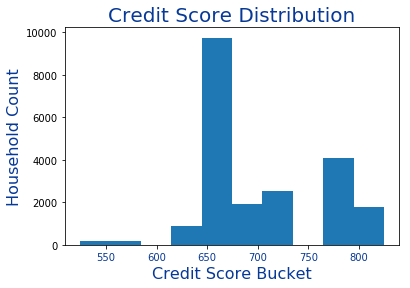

In [31]:
X = df['Credit Ranges']

plt.hist(X)
plt.ylabel('Household Count', fontsize = 16, color = '#073997')
plt.xlabel('Credit Score Bucket', fontsize = 16, color = '#073997')
plt.xticks( fontsize =10, color = '#073997')
plt.title('Credit Score Distribution', fontsize = 20, color = '#073997')
plt.savefig('User_Credit_Score', bbox_inches = 'tight')
plt.show

### Convert Income Level

In [32]:
df['Income'].value_counts()

100-149,999      2577
90-99,999        2400
70-79,999        1000
50-59,999         888
40-49,999         771
10-19,999         688
175 - 199,999     600
30-39,999         553
60-69,999         541
150 - 174,999     438
20-29,999         425
200 - 249,999     424
250K+             397
Under 10K         226
80-89,999          15
Name: Income, dtype: int64

In [33]:
#Create Income Buckets
incomes = [int(item.partition('-')[0]) + 5 for item in df['Income'].value_counts().index[:-3]]
incomes.extend([250, 10, 85])
incomes

[105, 95, 75, 55, 45, 15, 180, 35, 65, 155, 25, 205, 250, 10, 85]

In [34]:
income_dic = {k:v for k,v in zip(df['Income'].value_counts().index, incomes)}

In [35]:
income_dic[np.nan] = np.nan

In [36]:
income_dic

{'100-149,999': 105,
 '90-99,999': 95,
 '70-79,999': 75,
 '50-59,999': 55,
 '40-49,999': 45,
 '10-19,999': 15,
 '175 - 199,999': 180,
 '30-39,999': 35,
 '60-69,999': 65,
 '150 - 174,999': 155,
 '20-29,999': 25,
 '200 - 249,999': 205,
 '250K+': 250,
 'Under 10K': 10,
 '80-89,999': 85,
 nan: nan}

In [37]:
# Define Income Converter Function
def income_convert(x):
    return income_dic[x]

In [38]:
df['Income'] = df['Income'].apply(income_convert)

In [39]:
df['Income'].value_counts()

105.0    2577
95.0     2400
75.0     1000
55.0      888
45.0      771
15.0      688
180.0     600
35.0      553
65.0      541
155.0     438
25.0      425
205.0     424
250.0     397
10.0      226
85.0       15
Name: Income, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

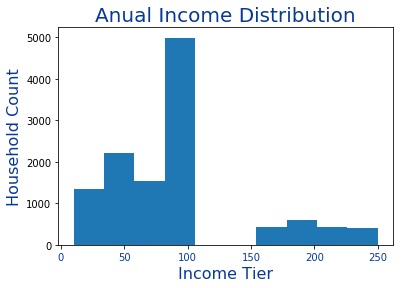

In [40]:
X = df['Income']

plt.hist(X)
plt.ylabel('Household Count', fontsize = 16, color = '#073997')
plt.xlabel('Income Tier', fontsize = 16, color = '#073997')
plt.xticks( fontsize =10, color = '#073997')
plt.title('Anual Income Distribution', fontsize = 20, color = '#073997')
plt.savefig('User_Income_Hist', bbox_inches = 'tight')
plt.show

### Explore Total Cost By household

In [41]:
df.groupby('Household Key')['Total Cost'].sum()

Household Key
875.0          1063.20
969.0           226.10
3338.0            0.00
8718.0            0.00
11524.0         294.25
13422.0         118.85
19747.0           0.00
20469.0         537.25
20850.0           0.00
25365.0           0.00
30007.0          34.00
37468.0           0.00
38093.0         555.85
41756.0         518.35
43381.0         102.00
49578.0          30.00
55047.0          60.00
55295.0           0.00
73421.0           0.00
93896.0         130.00
94927.0           0.00
103545.0        390.35
106487.0        178.70
115289.0          0.00
115306.0          0.00
115346.0          0.00
115351.0         38.00
115430.0         53.00
116806.0       2189.60
117430.0        165.00
                ...   
99800577.0      454.85
99817387.0      270.85
99817390.0        0.00
99839301.0        0.00
99843098.0      117.70
99851820.0      147.50
99873114.0      318.85
99881116.0      106.00
99953012.0       58.85
99987696.0       53.00
99991498.0        0.00
99992624.0      276.

In [42]:
features

['Number of Children',
 'Responded to Catalog',
 'Race',
 'Length Of Residence',
 'Mail Responder',
 'Home Owner',
 'Income',
 'Date Of Birth',
 'Children',
 'Education',
 'Dwelling Type',
 'Credit Ranges',
 'Language',
 'Gender']

In [43]:
simple_df = df[['Household Key','Number of Children', 'age', 'Income',  'Credit Ranges', 'Children', 'Total Cost' ]]

In [44]:
simple_df.head()

,Household Key,Number of Children,age,Income,Credit Ranges,Children,Total Cost
0,10462590.0,NaN,NaN,NaN,650,0,NaN
1,4500791.0,1.0,98.0,35.0,625,1,32.5
2,4500791.0,1.0,98.0,35.0,625,1,30.0
3,4500791.0,1.0,98.0,35.0,625,1,32.5
4,4500791.0,1.0,98.0,35.0,625,1,30.0


In [45]:
simple_df.groupby('Household Key').sum().head()

,Number of Children,age,Income,Credit Ranges,Children,Total Cost
Household Key,,,,,,
875.0,0.0,0.0,0.0,11700,0,1063.20
969.0,0.0,151.0,190.0,4250,0,226.10
3338.0,1.0,89.0,15.0,2025,1,0.00
8718.0,0.0,68.0,55.0,1475,0,0.00
11524.0,8.0,343.0,1105.0,5275,4,294.25


### Aggregate Values as you need them for prediction

In [46]:
grouped_df = simple_df.groupby('Household Key').agg({'Income': np.mean, 'Children': np.max, 'Credit Ranges': np.mean, 
                                                  'age': np.mean, 'Number of Children': 'sum', 'Total Cost': 'sum'})

In [47]:
grouped_df.head()

,Income,Children,Credit Ranges,age,Number of Children,Total Cost
Household Key,,,,,,
875.0,NaN,0,650.000000,NaN,0.0,1063.20
969.0,95.000000,0,708.333333,75.5,0.0,226.10
3338.0,15.000000,1,675.000000,89.0,1.0,0.00
8718.0,55.000000,0,737.500000,68.0,0.0,0.00
11524.0,157.857143,1,753.571429,49.0,8.0,294.25


In [48]:
fsv_count_df = pd.DataFrame(fsv_services['FSV Services Count'], columns = ['FSV Services Count'])
fsv_count_df.head(10)

,FSV Services Count
Household Key,
875.0,1
969.0,0
3338.0,0
8718.0,0
11524.0,0
13422.0,0
19747.0,0
20469.0,1
20850.0,0


In [49]:
fsv_count_df.shape

(5241, 1)

In [50]:
fsv_count_df['FSV Services Count'].value_counts()

0     4171
1      510
2      212
3      119
4       75
6       42
5       31
7       19
8       15
9       15
11       7
12       6
10       6
14       3
13       2
17       2
18       2
24       1
16       1
28       1
15       1
Name: FSV Services Count, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

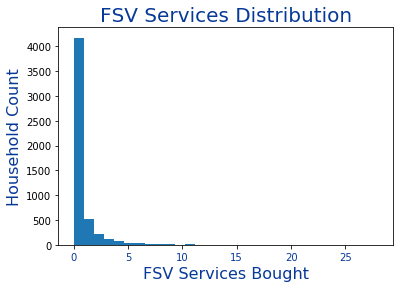

In [51]:
X = fsv_count_df['FSV Services Count']

plt.hist(X, bins = 30)
plt.ylabel('Household Count', fontsize = 16, color = '#073997')
plt.xlabel('FSV Services Bought', fontsize = 16, color = '#073997')
plt.xticks( fontsize =10, color = '#073997')
plt.title('FSV Services Distribution', fontsize = 20, color = '#073997')
plt.savefig('FSV_Count_Hist', bbox_inches = 'tight')
plt.show

In [62]:
grouped_df.head()

,Income,Children,Credit Ranges,age,Number of Children,Total Cost
Household Key,,,,,,
875.0,NaN,0,650.000000,NaN,0.0,1063.20
969.0,95.000000,0,708.333333,75.5,0.0,226.10
3338.0,15.000000,1,675.000000,89.0,1.0,0.00
8718.0,55.000000,0,737.500000,68.0,0.0,0.00
11524.0,157.857143,1,753.571429,49.0,8.0,294.25


In [63]:
result = pd.merge(grouped_df, fsv_count_df, how='left', on = 'Household Key')

In [64]:
result.head()

,Income,Children,Credit Ranges,age,Number of Children,Total Cost,FSV Services Count
Household Key,,,,,,,
875.0,NaN,0,650.000000,NaN,0.0,1063.20,1
969.0,95.000000,0,708.333333,75.5,0.0,226.10,0
3338.0,15.000000,1,675.000000,89.0,1.0,0.00,0
8718.0,55.000000,0,737.500000,68.0,0.0,0.00,0
11524.0,157.857143,1,753.571429,49.0,8.0,294.25,0


In [65]:
result.isna().sum()

Income                1642
Children                 0
Credit Ranges            0
age                   1960
Number of Children       0
Total Cost               0
FSV Services Count       0
dtype: int64

In [66]:
np.mean(result.Income), np.mean(result.age)

(87.71325807735467, 72.7576969060354)

In [67]:
np.std(result.Income), np.std(result.age)

(52.181845057118224, 14.027015328146632)

## Test what happens if you use median value to fill nan

In [58]:
# result.age.fillna(np.mean(result.age) - np.std(result.age), inplace = True)
# result.Income.fillna(np.mean(result.Income) - np.std(result.Income)/2, inplace = True)

In [59]:
# result.isna().sum()

Income                0
Children              0
Credit Ranges         0
age                   0
Number of Children    0
Total Cost            0
FSV Services Count    0
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

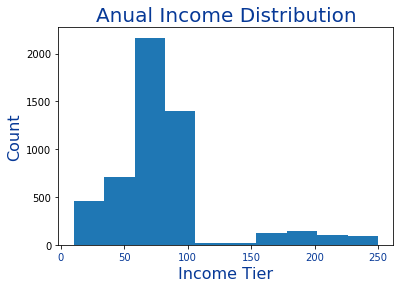

In [60]:
# X = result['Income']

# plt.hist(X)
# plt.ylabel('Count', fontsize = 16, color = '#073997')
# plt.xlabel('Income Tier', fontsize = 16, color = '#073997')
# plt.xticks( fontsize =10, color = '#073997')
# plt.title('Anual Income Distribution', fontsize = 20, color = '#073997')
# plt.show

In [ ]:
# X = result['age']

# plt.hist(X)
# plt.ylabel('Count', fontsize = 16, color = '#073997')
# plt.xlabel('Age', fontsize = 16, color = '#073997')
# plt.xticks( fontsize =10, color = '#073997')
# plt.title('Age Distribution', fontsize = 20, color = '#073997')
# plt.savefig('User_Children_histogram', bbox_inches = 'tight')
# plt.show

# NB NB NB - This is where we Change Grouped to Result!!!

In [120]:
result.head()

,Income,Credit Ranges,age,Number of Children,FSV Services Count,Total Cost
Household Key,,,,,,
969.0,95.000000,708.333333,75.500000,0.0,0,226.10
3338.0,15.000000,675.000000,89.000000,1.0,0,0.00
8718.0,55.000000,737.500000,68.000000,0.0,0,0.00
11524.0,157.857143,753.571429,49.000000,8.0,0,294.25
13422.0,95.000000,668.750000,69.333333,0.0,0,118.85


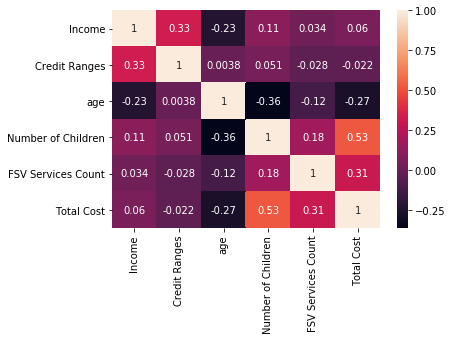

In [121]:
sns.heatmap(result.corr(), annot = True)

In [69]:
grouped_df = result

In [70]:
grouped_df.head()

,Income,Children,Credit Ranges,age,Number of Children,Total Cost,FSV Services Count
Household Key,,,,,,,
875.0,NaN,0,650.000000,NaN,0.0,1063.20,1
969.0,95.000000,0,708.333333,75.5,0.0,226.10,0
3338.0,15.000000,1,675.000000,89.0,1.0,0.00,0
8718.0,55.000000,0,737.500000,68.0,0.0,0.00,0
11524.0,157.857143,1,753.571429,49.0,8.0,294.25,0


In [71]:
grouped_df.drop(['Children'], axis =1, inplace = True)

In [72]:
df2 = grouped_df.pop('Total Cost')
grouped_df['Total Cost'] = df2

In [73]:
grouped_df.head()

,Income,Credit Ranges,age,Number of Children,FSV Services Count,Total Cost
Household Key,,,,,,
875.0,NaN,650.000000,NaN,0.0,1,1063.20
969.0,95.000000,708.333333,75.5,0.0,0,226.10
3338.0,15.000000,675.000000,89.0,1.0,0,0.00
8718.0,55.000000,737.500000,68.0,0.0,0,0.00
11524.0,157.857143,753.571429,49.0,8.0,0,294.25


### Try dropping Outlier 15K Cost to improve models

In [74]:
grouped_df[grouped_df['Total Cost'] == 14113.850000]

,Income,Credit Ranges,age,Number of Children,FSV Services Count,Total Cost
Household Key,,,,,,
90083049.0,95.0,653.75,36.75,18.0,0,14113.85


In [75]:
grouped_df[grouped_df['Total Cost'] == 14113.850000].index

Float64Index([90083049.0], dtype='float64', name='Household Key')

In [76]:
grouped_df.drop(grouped_df[grouped_df['Total Cost'] == 14113.850000].index , inplace=True)

In [77]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5240 entries, 875.0 to 100079136.0
Data columns (total 6 columns):
Income                3598 non-null float64
Credit Ranges         5240 non-null float64
age                   3280 non-null float64
Number of Children    5240 non-null float64
FSV Services Count    5240 non-null int64
Total Cost            5240 non-null float64
dtypes: float64(5), int64(1)
memory usage: 286.6 KB


In [78]:
grouped_df.dropna(inplace = True)

In [79]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3273 entries, 969.0 to 100071861.0
Data columns (total 6 columns):
Income                3273 non-null float64
Credit Ranges         3273 non-null float64
age                   3273 non-null float64
Number of Children    3273 non-null float64
FSV Services Count    3273 non-null int64
Total Cost            3273 non-null float64
dtypes: float64(5), int64(1)
memory usage: 179.0 KB


### Save Grouped to CSV

In [80]:
grouped_df.to_csv('grouped.csv')

### Do Some Data Exploration

<function matplotlib.pyplot.show(*args, **kw)>

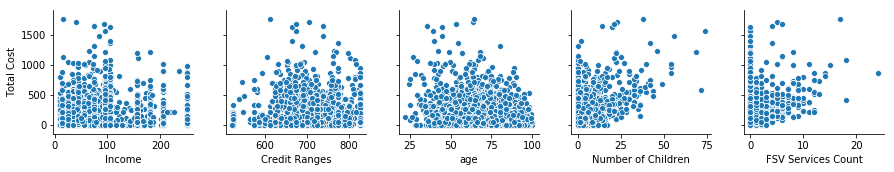

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

variables = list(grouped_df.columns)[:-1]
sns.pairplot(grouped_df, x_vars=variables, y_vars=['Total Cost'])
plt.savefig('Pairplots_corr', bbox_inches = 'tight')
plt.show

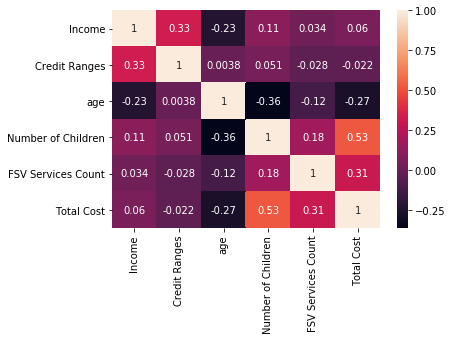

In [135]:
sns.heatmap(grouped_df.corr(), annot = True)
plt.savefig('Linear_Feature_corr', bbox_inches = 'tight')

### Instantiate some Models

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans, SpectralClustering

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [124]:
ln = LinearRegression()
tree = DecisionTreeRegressor(max_depth = 3)

### Define X, y training features

In [122]:
X = grouped_df.drop('Total Cost', axis = 1)
y = grouped_df['Total Cost']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 18)

### Train Models

In [125]:
ln.fit(X_train, y_train)
tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [126]:
ln.score(X_test, y_test), tree.score(X_test, y_test)

(0.372299620483331, 0.35129687867849635)

In [127]:
ln.coef_, tree.feature_importances_

(array([-0.09509516, -0.13569591, -1.43583289, 14.67194001, 24.74589347]),
 array([0.       , 0.       , 0.       , 0.8519852, 0.1480148]))

In [128]:
coef_df = pd.DataFrame({'coefs': ln.coef_, 'feature': X_test.columns})
coef_df.head()

,coefs,feature
0,-0.095095,Income
1,-0.135696,Credit Ranges
2,-1.435833,age
3,14.671940,Number of Children
4,24.745893,FSV Services Count


([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

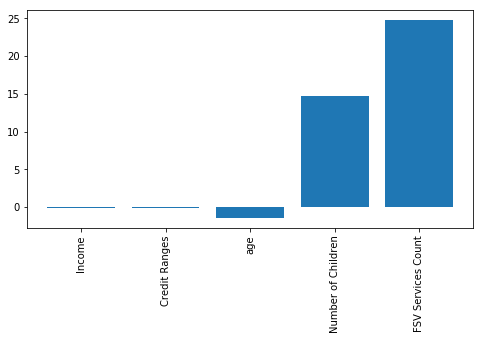

In [129]:
plt.figure(figsize = (8,4))
plt.bar(coef_df['feature'], coef_df['coefs'])
plt.xticks(rotation = 90)

In [130]:
pred_ln = ln.predict(X_test)
pred_tree = tree.predict(X_test)

In [131]:
np.sqrt(mean_squared_error(y_test, pred_ln))

142.9005429567835

In [132]:
np.sqrt(mean_squared_error(y_test, pred_tree))

145.27158571268382

### Try Scaling and using Polynomial Features

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
test_table = grouped_df.drop(['Total Cost'], axis = 1)
scaled = scaler.fit_transform(test_table)
scaled_df = pd.DataFrame(scaled, index = grouped_df.index, columns=[test_table.columns])
# scaled_table = scale(test_table2)
# scaled_table = pd.DataFrame(scaled_table, columns=[test_table2.columns])
# scaled_table['Children'] = grouped_df['Children']
# scaled_table['Total Cost'] = grouped_df['Total Cost']
# scaled_table.head()

In [ ]:
grouped_df.head()

In [ ]:
scaled_df.head()

In [ ]:
scaled_columns = ['Income', 'Credit Ranges', 'age', 'Number of Children', 'FSV Services Count']

In [ ]:
# scaled_df['Children'] = grouped_df['Children']
scaled_df['Total Cost'] = grouped_df['Total Cost']

In [ ]:
scaled_df.head()

In [ ]:
X_scaled = scaled_df.drop(['Total Cost'], axis = 1)
y = grouped_df['Total Cost']

In [ ]:
X_scaled.columns

In [ ]:
X_scaled.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 15)

In [ ]:
ln.fit(X_train, y_train)
ln.score(X_test, y_test)
coef_df = pd.DataFrame({'coefs': ln.coef_, 'feature': scaled_columns})
coef_df.head()

In [ ]:
yhat = ln.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, yhat))
z_score = RMSE/np.std(y_test)
R_squared = ln.score(X_test, y_test)
print("RMSE = {}, z_score = {}, R_squared = {}".format(RMSE, z_score, R_squared))

In [ ]:
coefs = coef_df['coefs']
varias = coef_df['feature']
plt.figure(figsize = (9,7))
plt.title("Importance of Predictive Metrics", fontsize = 24, color = "#535355")
plt.xlabel("Independent Variable", fontsize = 18, color = "#050594")
plt.ylabel("Coefficient Size", fontsize = 18, color = "#050594")
plt.xticks(rotation=60)
plt.bar(varias, coefs)
plt.savefig('Cost_Reg_Coefs', bbox_inches = 'tight')
plt.show

In [ ]:
import matplotlib.patches as mpatches

def bias(y, y_hat):
    return np.mean(y_hat - y)

def variance(y_hat):
    return np.mean([yi**2 for yi in y_hat]) - np.mean(y_hat)**2

y_hat_train = ln.predict(X_train)
y_hat_test = ln.predict(X_test)
bias_train = bias(y_train, y_hat_train)
bias_test = bias(y_test, y_hat_test)
var_train = variance(y_hat_train)
var_test = variance(y_hat_test)

RMSE_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
z_score_train = RMSE/np.std(y_train)
R_squared_train = ln.score(X_train, y_train)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (15,5))

ax1.set_title("Scaled y_hat_train vs y_train", fontsize = 16)
ax1.set_xlabel("y_train",fontsize = 14, color = "#073A5A")
ax1.set_ylabel("y_hat_train",fontsize = 14, color = "#073A5A")
ax1.scatter(y_train, y_hat_train, color = "blue", label='Actual Data')
ax1.plot(y_train, y_train, color = "red", label='Model')

R2_patch = mpatches.Patch(color='#aaff80', label="R_squared_train = {}".format(round(R_squared_train, 3)))
RMSE_patch = mpatches.Patch(color='#ffd480', label="RMSE_train = {}".format(round(RMSE_train, 3)))
z_patch = mpatches.Patch(color='#00cccc', label="z_score_train = {}".format(round(z_score_train, 3)))
Bias_patch = mpatches.Patch(color='#670000', label="Bias_train = {}".format(round(bias_train, 20)))
Variance_patch = mpatches.Patch(color='#7A9A01', label="Var_train = {}".format(round(var_train, 3)))

ax1.legend(handles=[R2_patch, RMSE_patch, z_patch, Bias_patch, Variance_patch])

ax2.set_title("Scaled y_hat_test vs y_test", fontsize = 16)
ax2.set_xlabel("y_test", fontsize = 14, color = "#073A5A")
ax2.set_ylabel("y_hat_test", fontsize = 14, color = "#073A5A")
ax2.scatter(y_test, y_hat_test, color = "blue")
ax2.plot(y_test, y_test, color = "red")

R2_patch = mpatches.Patch(color='#aaff80', label="R_squared = {}".format(round(R_squared, 3)))
RMSE_patch = mpatches.Patch(color='#ffd480', label="RMSE = {}".format(round(RMSE, 3)))
z_patch = mpatches.Patch(color='#00cccc', label="z_score = {}".format(round(z_score, 3)))
Bias_patch = mpatches.Patch(color='#670000', label="Bias = {}".format(round(bias_test, 3)))
Variance_patch = mpatches.Patch(color='#7A9A01', label="Var = {}".format(round(var_test, 3)))

ax2.legend(handles=[R2_patch, RMSE_patch, z_patch,  Bias_patch, Variance_patch], loc = "upper left")

plt.savefig('Cosst_Reg_model_comp', bbox_inches = 'tight')
plt.show

In [ ]:
test = list(zip(ln.coef_, coef_df['feature']))
combined = [str(round(item[0], 2)) + "*" +item[1] for item in test]
one_string = "  +  ".join(combined)
equation = one_string.replace("+  -", "-  ")

In [ ]:
print("y = {} + {}".format(round(ln.intercept_, 2), equation))

### Try adding some Categorical Features

### Try Polynomials

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing, pipeline
from sklearn.preprocessing import scale

poly = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
features_poly = pd.DataFrame(poly.fit_transform(X_scaled), index = grouped_df.index, columns = poly.get_feature_names(scaled_columns))

X_poly = features_poly

In [ ]:
X_poly.head()

In [ ]:
import seaborn as sns

sns.set(style="white")


# Compute the correlation matrix
corr = X_poly.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
plt.title("Polynomials Correlation Heatmap", fontsize = 30, color = "#F97E77")
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
X_poly.shape

#### Drop any features with Corr > 0.90

In [ ]:
# Create correlation matrix
corr_matrix = features_poly.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

#Drop variables from table
X_poly.drop(columns=to_drop, inplace=True)
X_poly.shape

In [ ]:
X_poly.head()

### Run Linear Regression Model (80-20 split) and use Cross validation to find model with smallest RMSE

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold

def MSE_test(X_poly, y, random_state = 9):
    poly_RSME = []
    for i in range(1, len(X_poly.columns)):
        linreg = Ridge()
        selector = RFE(linreg, n_features_to_select = i)
        selector = selector.fit(X_poly, y)
        selected_columns = X_poly.columns[selector.support_]
        selected_var = [column for column in selected_columns]
        X_train, X_test, y_train, y_test = train_test_split(X_poly[selected_columns], y, random_state = random_state,  test_size=.20)
        
        crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
        cv_10_results = np.mean(cross_val_score(linreg, X_train, y_train, cv=crossvalidation, scoring='neg_mean_squared_error'))
        cv_10_results= np.sqrt(abs(cv_10_results))
        poly_RSME.append(dict(variables = selected_var, RMSE = cv_10_results, nu_var = len( selected_var)))
    return poly_RSME

poly_model_list = MSE_test(X_poly, y)

def find_best_model(model_list):
    sorted_mse = sorted(model_list, key=lambda k: k['RMSE'])
    return sorted_mse[0]
    
find_best_model(poly_model_list)

### Graph the Minimized RMSE Against Features

In [ ]:
import matplotlib.patches as mpatches

min_rmse = find_best_model(poly_model_list)['RMSE']
min_var = find_best_model(poly_model_list)['nu_var']
x_val = [item['nu_var'] for item in poly_model_list[:55]]
y_val = [item['RMSE'] for item in poly_model_list[:55]]
plt.figure(figsize = (9,7))
plt.title("Minimizing RMSE Function", fontsize = 25, color = "#073A5A")
plt.plot(x_val, y_val)
plt.xlabel("Number of Independent Variables", fontsize = 18, color = "#073A5A")
plt.ylabel("RMSE", fontsize = 18, color = "#073A5A")

rmse_patch = mpatches.Patch(color='blue', label="RMSE = {}".format(round(min_rmse, 3)))
vars_patch = mpatches.Patch(color='green', label="Variables Chosen = {}".format(min_var))
plt.legend(handles=[rmse_patch, vars_patch])

plt.savefig('Feature_selection', bbox_inches = 'tight')
plt.show

### Now Test the Model with Selected Variables

In [ ]:
selected_columns = find_best_model(poly_model_list)['variables']
X_train, X_test, y_train, y_test = train_test_split(X_poly[selected_columns], y, random_state = 18,  test_size=.20)

linreg = LinearRegression().fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
bias_train = bias(y_train, y_hat_train)
bias_test = bias(y_test, y_hat_test)
var_train = variance(y_hat_train)
var_test = variance(y_hat_test)

RMSE_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
z_score_train = RMSE/np.std(y_train)
R_squared_train = linreg.score(X_train, y_train)

RMSE = np.sqrt(mean_squared_error(y_test, y_hat_test))
z_score = RMSE/np.std(y_test)
R_squared = linreg.score(X_test, y_test)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (15,5))

ax1.set_title("Polynomial y_hat_train vs y_train", fontsize = 16)
ax1.set_xlabel("y_train",fontsize = 14, color = "#073A5A")
ax1.set_ylabel("y_hat_train",fontsize = 14, color = "#073A5A")
ax1.scatter(y_train, y_hat_train, color = "blue", label='Actual Data')
ax1.plot(y_train, y_train, color = "red", label='Model')

R2_patch = mpatches.Patch(color='#aaff80', label="R_squared_train = {}".format(round(R_squared_train, 3)))
RMSE_patch = mpatches.Patch(color='#ffd480', label="RMSE_train = {}".format(round(RMSE_train, 3)))
z_patch = mpatches.Patch(color='#00cccc', label="z_score_train = {}".format(round(z_score_train, 3)))
Bias_patch = mpatches.Patch(color='#670000', label="Bias_train = {}".format(round(bias_train, 20)))
Variance_patch = mpatches.Patch(color='#7A9A01', label="Var_train = {}".format(round(var_train, 3)))

ax1.legend(handles=[R2_patch, RMSE_patch, z_patch, Bias_patch, Variance_patch])

ax2.set_title("Polynomial y_hat_test vs y_test", fontsize = 16)
ax2.set_xlabel("y_test", fontsize = 14, color = "#073A5A")
ax2.set_ylabel("y_hat_test", fontsize = 14, color = "#073A5A")
ax2.scatter(y_test, y_hat_test, color = "blue")
ax2.plot(y_test, y_test, color = "red")

R2_patch = mpatches.Patch(color='#aaff80', label="R_squared = {}".format(round(R_squared, 3)))
RMSE_patch = mpatches.Patch(color='#ffd480', label="RMSE = {}".format(round(RMSE, 3)))
z_patch = mpatches.Patch(color='#00cccc', label="z_score = {}".format(round(z_score, 3)))
Bias_patch = mpatches.Patch(color='#670000', label="Bias = {}".format(round(bias_test, 3)))
Variance_patch = mpatches.Patch(color='#7A9A01', label="Var = {}".format(round(var_test, 3)))

ax2.legend(handles=[R2_patch, RMSE_patch, z_patch,  Bias_patch, Variance_patch], loc = "upper left")
plt.savefig('Cost_Reg_Ply_Models', bbox_inches = 'tight')
plt.show

In [ ]:
test = list(zip(linreg.coef_, selected_columns))
combined = [str(round(item[0], 2)) + "*" +item[1] for item in test]
one_string = "  +  ".join(combined)
equation = one_string.replace("+  -", "-  ")

In [ ]:
print("y = {} + {}".format(round(linreg.intercept_, 2), equation))

In [ ]:
coefs = [item[0] for item in test]
varias = [item[1] for item in test]
plt.figure(figsize = (9,7))
plt.title("Independent Variables Chart", fontsize = 30, color = "#535355")
plt.xlabel("Independent Variable", fontsize = 18, color = "#050594")
plt.ylabel("Coefficient Size", fontsize = 18, color = "#050594")
plt.xticks(rotation=90)
plt.bar(varias, coefs)

## Classifier Test

In [85]:
class_df = pd.read_csv('grouped.csv')
class_df = class_df.set_index('Household Key')
class_df.head()

,Income,Credit Ranges,age,Number of Children,FSV Services Count,Total Cost
Household Key,,,,,,
969.0,95.000000,708.333333,75.500000,0.0,0,226.10
3338.0,15.000000,675.000000,89.000000,1.0,0,0.00
8718.0,55.000000,737.500000,68.000000,0.0,0,0.00
11524.0,157.857143,753.571429,49.000000,8.0,0,294.25
13422.0,95.000000,668.750000,69.333333,0.0,0,118.85


In [86]:
class_df.shape

(3273, 6)

In [87]:
import scikitplot as skplt

In [88]:
a = np.array(class_df['FSV Services Count'])
class_df['FSV Bought'] = np.where(a ==0, a, 1)

In [89]:
class_df['FSV Bought'].value_counts()

0    2408
1     865
Name: FSV Bought, dtype: int64

In [90]:
class_df.head()

,Income,Credit Ranges,age,Number of Children,FSV Services Count,Total Cost,FSV Bought
Household Key,,,,,,,
969.0,95.000000,708.333333,75.500000,0.0,0,226.10,0
3338.0,15.000000,675.000000,89.000000,1.0,0,0.00,0
8718.0,55.000000,737.500000,68.000000,0.0,0,0.00,0
11524.0,157.857143,753.571429,49.000000,8.0,0,294.25,0
13422.0,95.000000,668.750000,69.333333,0.0,0,118.85,0


In [91]:
df2 = class_df.pop('FSV Bought')
class_df['FSV Bought'] = df2

In [94]:
class_df.drop('FSV Services Count', axis =1, inplace = True)

In [ ]:
class_df.shape

In [ ]:
class_df.head()

In [92]:
y = class_df.pop('FSV Bought')
X = class_df

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 18)

In [97]:
X.head()

,Income,Credit Ranges,age,Number of Children,Total Cost
Household Key,,,,,
969.0,95.000000,708.333333,75.500000,0.0,226.10
3338.0,15.000000,675.000000,89.000000,1.0,0.00
8718.0,55.000000,737.500000,68.000000,0.0,0.00
11524.0,157.857143,753.571429,49.000000,8.0,294.25
13422.0,95.000000,668.750000,69.333333,0.0,118.85


In [95]:
y.head()

Household Key
969.0      0
3338.0     0
8718.0     0
11524.0    0
13422.0    0
Name: FSV Bought, dtype: int64

In [96]:
class_df.head()

,Income,Credit Ranges,age,Number of Children,Total Cost
Household Key,,,,,
969.0,95.000000,708.333333,75.500000,0.0,226.10
3338.0,15.000000,675.000000,89.000000,1.0,0.00
8718.0,55.000000,737.500000,68.000000,0.0,0.00
11524.0,157.857143,753.571429,49.000000,8.0,294.25
13422.0,95.000000,668.750000,69.333333,0.0,118.85


In [108]:
log = LogisticRegression()
forest = RandomForestClassifier(max_depth=3)

In [109]:
log.fit(X_train, y_train)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [110]:
log.score(X_test, y_test)

0.7509157509157509

In [111]:
y_test.value_counts(normalize = True)

0    0.750916
1    0.249084
Name: FSV Bought, dtype: float64

In [112]:
forest.score(X_test, y_test)

0.7509157509157509

### Evaluate Performance with scikitplot Viz for Classifiers

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


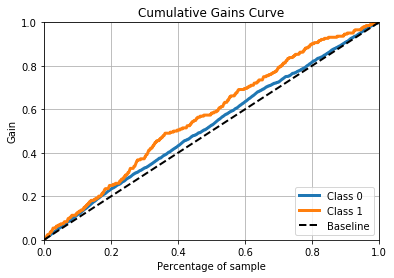

In [114]:
skplt.metrics.plot_cumulative_gain(y_test, log.predict_proba(X_test))

#### For both graphs we can see that if we sampled 20-30% of our USers, we would start doing better than average and after 60-70% we are maximizing our performance

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


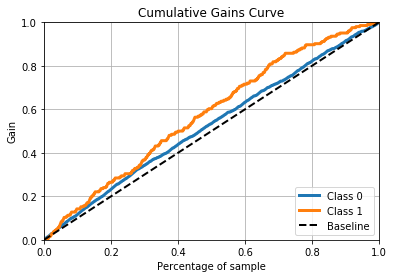

In [115]:
skplt.metrics.plot_cumulative_gain(y_test, forest.predict_proba(X_test))

### If we are able to isolate those 60% of people that we have high confidence for Lift, we will see an imporvement in productivity when trying to increase purchase of  FSV Services

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


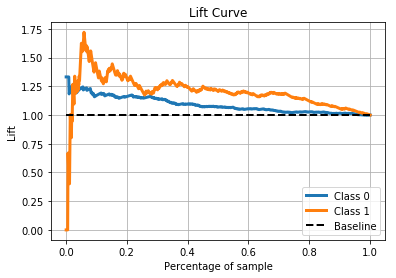

In [118]:
skplt.metrics.plot_lift_curve(y_test, forest.predict_proba(X_test))

### Using PCA and other dimentionality reduction techniques can improve model performance, but can hurt interpretability for business insights

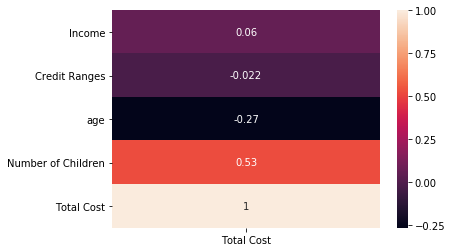

In [137]:
sns.heatmap(class_df.corr()[['Total Cost']], annot = True)

### Clustering Model

In [138]:
from sklearn.cluster import KMeans, SpectralClustering

In [142]:
cluster_df = pd.read_csv('grouped.csv')
cluster_df = cluster_df.set_index('Household Key')
cluster_df.head()

,Income,Credit Ranges,age,Number of Children,FSV Services Count,Total Cost
Household Key,,,,,,
969.0,95.000000,708.333333,75.500000,0.0,0,226.10
3338.0,15.000000,675.000000,89.000000,1.0,0,0.00
8718.0,55.000000,737.500000,68.000000,0.0,0,0.00
11524.0,157.857143,753.571429,49.000000,8.0,0,294.25
13422.0,95.000000,668.750000,69.333333,0.0,0,118.85


In [144]:
cluster_df.isna().sum()

Income                0
Credit Ranges         0
age                   0
Number of Children    0
FSV Services Count    0
Total Cost            0
dtype: int64

In [145]:
X = cluster_df

In [146]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [147]:
kmeans.labels_

array([2, 0, 0, ..., 0, 2, 1], dtype=int32)

In [152]:
cluster_df['cluster'] = kmeans.labels_
cluster_df.head()

,Income,Credit Ranges,age,Number of Children,FSV Services Count,Total Cost,cluster
Household Key,,,,,,,
969.0,95.000000,708.333333,75.500000,0.0,0,226.10,2
3338.0,15.000000,675.000000,89.000000,1.0,0,0.00,0
8718.0,55.000000,737.500000,68.000000,0.0,0,0.00,0
11524.0,157.857143,753.571429,49.000000,8.0,0,294.25,2
13422.0,95.000000,668.750000,69.333333,0.0,0,118.85,0


In [151]:
cluster_df['cluster'].value_counts()

0    1999
2     893
1     311
3      70
Name: cluster, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

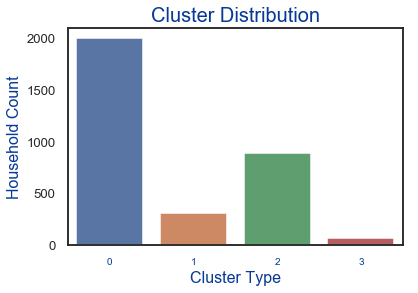

In [180]:
X = cluster_df['cluster']

# plt.hist(X, bins = 10)
sns.set_context("talk", font_scale=0.8)
# sns.set(style="white")
sns.countplot(X)
plt.ylabel('Household Count', fontsize = 16, color = '#073997')
plt.xlabel('Cluster Type', fontsize = 16, color = '#073997')
plt.xticks( fontsize =10, color = '#073997')
plt.title('Cluster Distribution', fontsize = 20, color = '#073997')
plt.savefig('Cluster_Hist', bbox_inches = 'tight')
plt.show

In [183]:
cluster_df.groupby('cluster')['Number of Children'].mean()

cluster
0     1.341171
1     8.594855
2     4.038074
3    18.042857
Name: Number of Children, dtype: float64

In [191]:
C0 = cluster_df[cluster_df.cluster == 0]
C1 = cluster_df[cluster_df.cluster == 1]
C2 = cluster_df[cluster_df.cluster == 2]
C3 = cluster_df[cluster_df.cluster == 3]

In [193]:
C0.describe()

,Income,Credit Ranges,age,Number of Children,FSV Services Count,Total Cost,cluster
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.0
mean,85.635383,713.938047,74.978183,1.341171,0.372186,42.292076,0.0
std,51.358641,56.074275,13.042623,2.324449,0.761003,41.416152,0.0
min,10.000000,524.000000,25.000000,0.000000,0.000000,0.000000,0.0
25%,50.000000,675.000000,68.500000,0.000000,0.000000,0.000000,0.0
50%,95.000000,712.500000,75.000000,0.000000,0.000000,34.000000,0.0
75%,105.000000,757.738095,84.833333,2.000000,0.000000,68.250000,0.0
max,250.000000,825.000000,100.000000,22.000000,6.000000,138.500000,0.0


In [194]:
C1.describe()

,Income,Credit Ranges,age,Number of Children,FSV Services Count,Total Cost,cluster
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.0
mean,91.356424,708.927240,67.172059,8.594855,1.636656,487.603666,1.0
std,49.434170,57.018531,14.806699,11.245494,3.159186,103.198646,0.0
min,10.000000,538.888889,24.571429,0.000000,0.000000,353.280000,1.0
25%,55.000000,670.000000,57.564103,0.000000,0.000000,398.000000,1.0
50%,95.000000,705.555556,68.000000,5.000000,0.000000,465.500000,1.0
75%,105.000000,756.071429,78.500000,12.000000,1.000000,557.275000,1.0
max,250.000000,825.000000,97.727273,72.000000,18.000000,747.000000,1.0


In [195]:
C2.describe()

,Income,Credit Ranges,age,Number of Children,FSV Services Count,Total Cost,cluster
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.0
mean,95.578375,719.544404,70.904719,4.038074,0.884658,219.079306,2.0
std,54.130770,56.606492,14.131072,5.620740,1.832419,62.324141,0.0
min,10.000000,524.000000,22.000000,0.000000,0.000000,121.500000,2.0
25%,55.000000,675.000000,62.750000,0.000000,0.000000,164.430000,2.0
50%,95.000000,725.000000,72.000000,2.000000,0.000000,212.000000,2.0
75%,105.000000,768.750000,81.000000,6.000000,1.000000,268.000000,2.0
max,250.000000,825.000000,99.000000,36.000000,12.000000,357.000000,2.0


In [196]:
C3.describe()

,Income,Credit Ranges,age,Number of Children,FSV Services Count,Total Cost,cluster
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0
mean,94.595249,707.402129,57.542034,18.042857,3.185714,1008.699714,3.0
std,59.775244,63.324886,16.268343,18.221214,5.446160,263.235827,0.0
min,10.555556,575.000000,25.000000,0.000000,0.000000,755.850000,3.0
25%,57.017544,666.832386,43.975000,2.250000,0.000000,807.750000,3.0
50%,85.267857,689.855072,59.669683,14.500000,0.000000,915.475000,3.0
75%,105.000000,760.507246,68.812500,24.750000,4.750000,1078.587500,3.0
max,250.000000,825.000000,90.000000,74.000000,24.000000,1763.700000,3.0


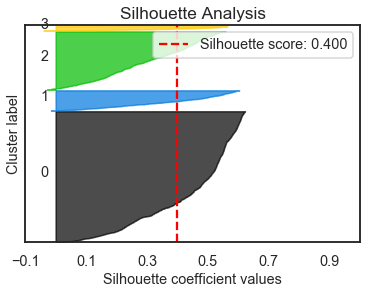

In [197]:
skplt.metrics.plot_silhouette(cluster_df, cluster_df['cluster'])